In [1]:
# Group: Dominic Klusek, Johnathan Rozen
# CSC 732 HW# 1 Part 1

<h1>Description of Ionosphere Dataset</h1>

<h3>Data Set Information:</h3>
<p>This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.</p>
<p>Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.</p>

<h3>Attribute Information</h3>
    <ul>
        <li>There are 34 numeric (float values) attributes, all with values between -1.0 to 1.0, and are reading of the pulse numbers for the Goose Bay System</li>
        <li>The dataset contains 2 class 'g' for Good and 'b' for Bad</li>
        <li>The number of instances in each class are 'b' : 126
'g' : 225</li>
    All data was captured using ther same setup of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.
    </ul>

<h5 style='color:blue'>Listing 1a: Load libraries</h5>

In [2]:
# increase width of jupyter notebook cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# Load Libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import numpy as np

In [4]:
# pandas limites the output of functions to prevent overlarge outputs so setting these options will force the library to print all columns
import pandas as pd
pd.set_option('display.max_columns', 500)

# prevent warning because some functions in sklearn have deprecation warning (ONLY ENABLE FOR FINAL CODE)
import warnings
warnings.filterwarnings("ignore")

<h5 style='color:blue'>Listing 1b: Loading the Ionosphere Dataset</h5>

In [5]:
# load dataset
filename = 'Dataset/ionosphere.data'
names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'D30', 'D31', 'D32', 'D33', 'D34', 'class']
dataset = read_csv(filename, names=names, delimiter=',')

<h5 style='color:blue'>Listing 2: Dimensionsof thedataset. Peek at the data itself. Statistical summary of all attributes. Break down of the data by the class variable </h5>

In [6]:
# Print shape of dataset
print(dataset.shape)

(351, 35)


<p>So the dataset has 351 examples, with 35 attributes for each data example</p>

In [7]:
# Peak at first 20 lines of dataset
print(dataset.head(20)) # this is the final output for when we submit, but its ugly
#dataset.head(20)

    A1  A2       A3       A4       A5       A6       A7       A8       A9  \
0    1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1    1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2    1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3    1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4    1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
5    1   0  0.02337 -0.00592 -0.09924 -0.11949 -0.00763 -0.11824  0.14706   
6    1   0  0.97588 -0.10602  0.94601 -0.20800  0.92806 -0.28350  0.85996   
7    0   0  0.00000  0.00000  0.00000  0.00000  1.00000 -1.00000  0.00000   
8    1   0  0.96355 -0.07198  1.00000 -0.14333  1.00000 -0.21313  1.00000   
9    1   0 -0.01864 -0.08459  0.00000  0.00000  0.00000  0.00000  0.11470   
10   1   0  1.00000  0.06655  1.00000 -0.18388  1.00000 -0.27320  1.00000   
11   1   0  1.00000 -0.54210  1.00000 -1.00000  1.00000 -1.00000  1.00000   

<p>Looking at the head values it can be seen that values range from -1 to 1 for all attributes besides the class label which is either a 'b' or 'g'.</p>

In [8]:
# Print statistical descroptions of the dataset
print(dataset.describe()) # final output for submission
#dataset.describe()

               A1     A2          A3          A4          A5          A6  \
count  351.000000  351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738    0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155    0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000    0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000    0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000    0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000   

               A7          A8          A9         B10         B11         B12  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     0.550095    0.119360    0.511848    0.181345    0.476183    0.155040   
std      0.492654    0.520750    0.507066    0.483851    0.563496    0.4

<p>Looking at statisitical decription of the distibution of the data could be helpful for later analysis or data pre-processing</p>

In [9]:
# Print class distribution of dataset
print(dataset.groupby('class').size())

class
b    126
g    225
dtype: int64


<p>The dataset has a slight imbalance with the 'g' class having roughly 2x the amount of examples than the 'b' class; however, with such a small dataset this imbalance shouldn't affect our model's performance in a significant manner.</p>

<h5 style='color:blue'>Listing 3: Univariate plots to better understand each attribute. Multivariate plots to better understand the relationships between attributes.</h5>

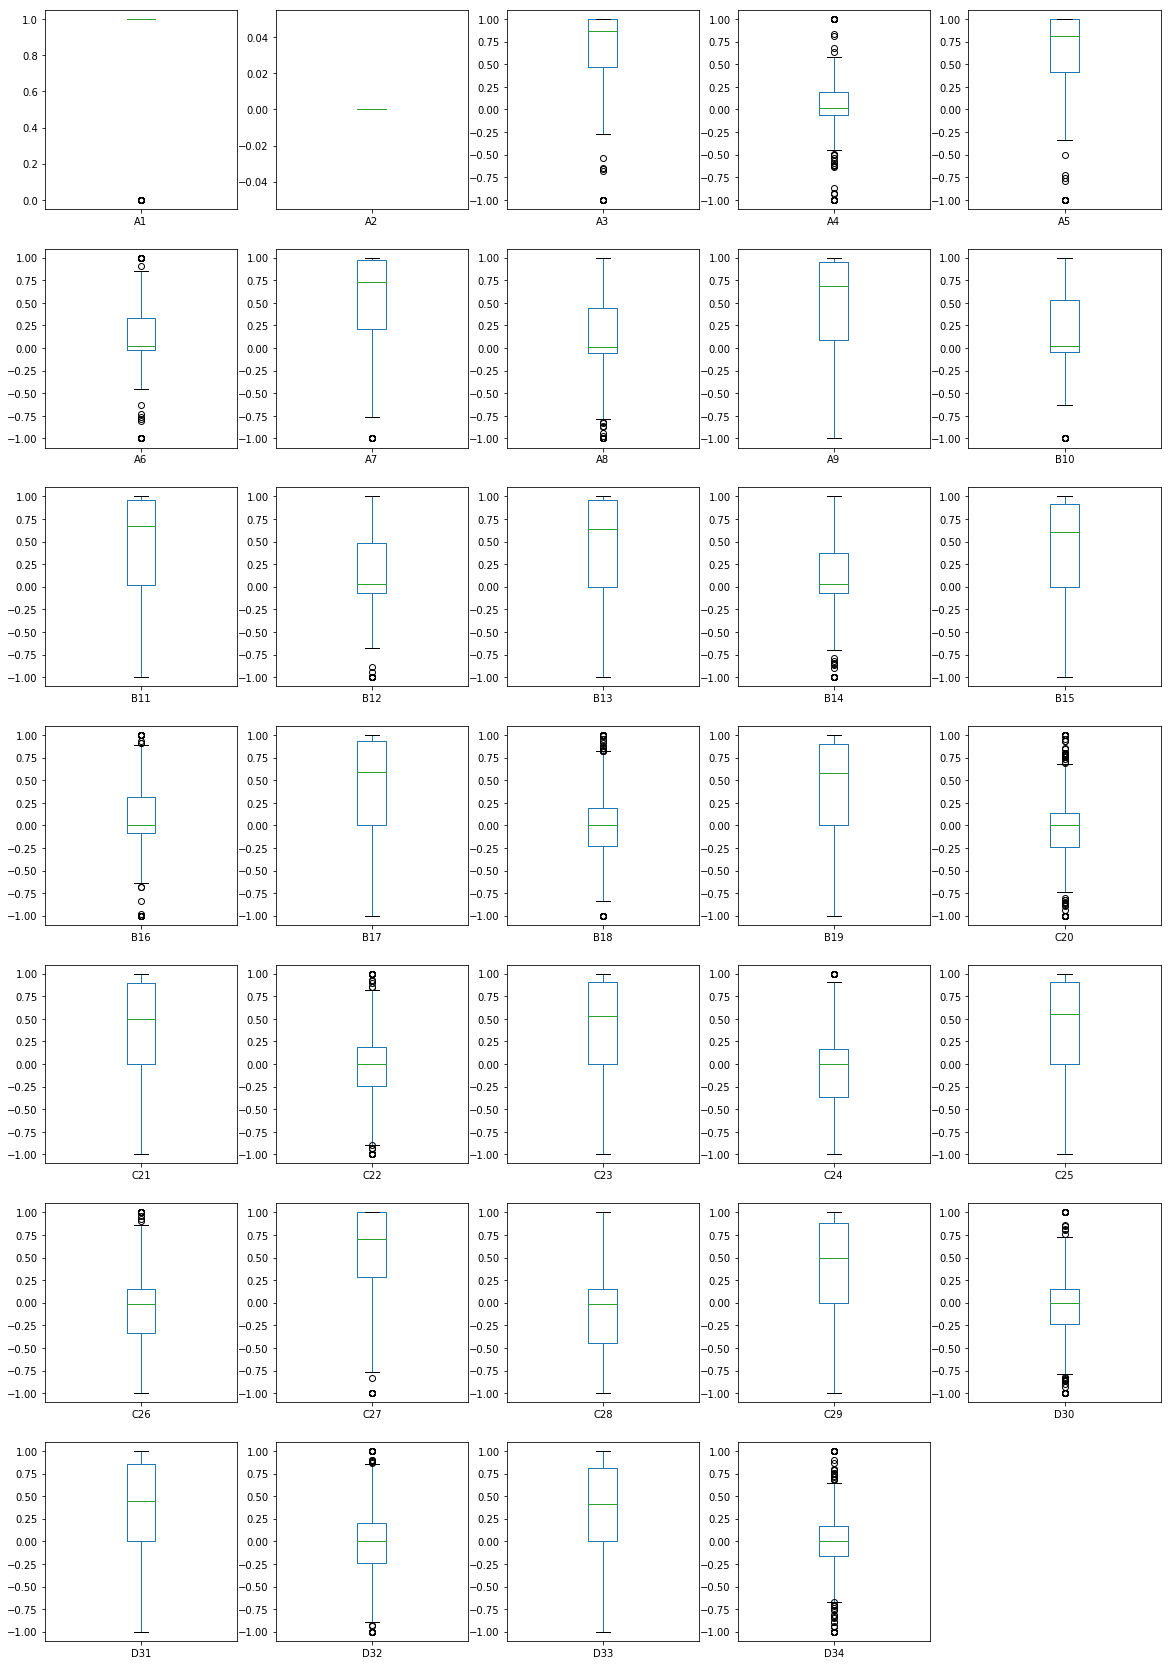

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(20,30))
plt.show()

<p>Box and whisker plots are a great way to visualize the statistics that are displayed when utilizing the describe function on a Pandas Dataframe. We can also see that there are not a large number of outlier points for most of the attributes, and that off numbered attributes are skewed towards 1, while even numbered attributes are most centered. </p>

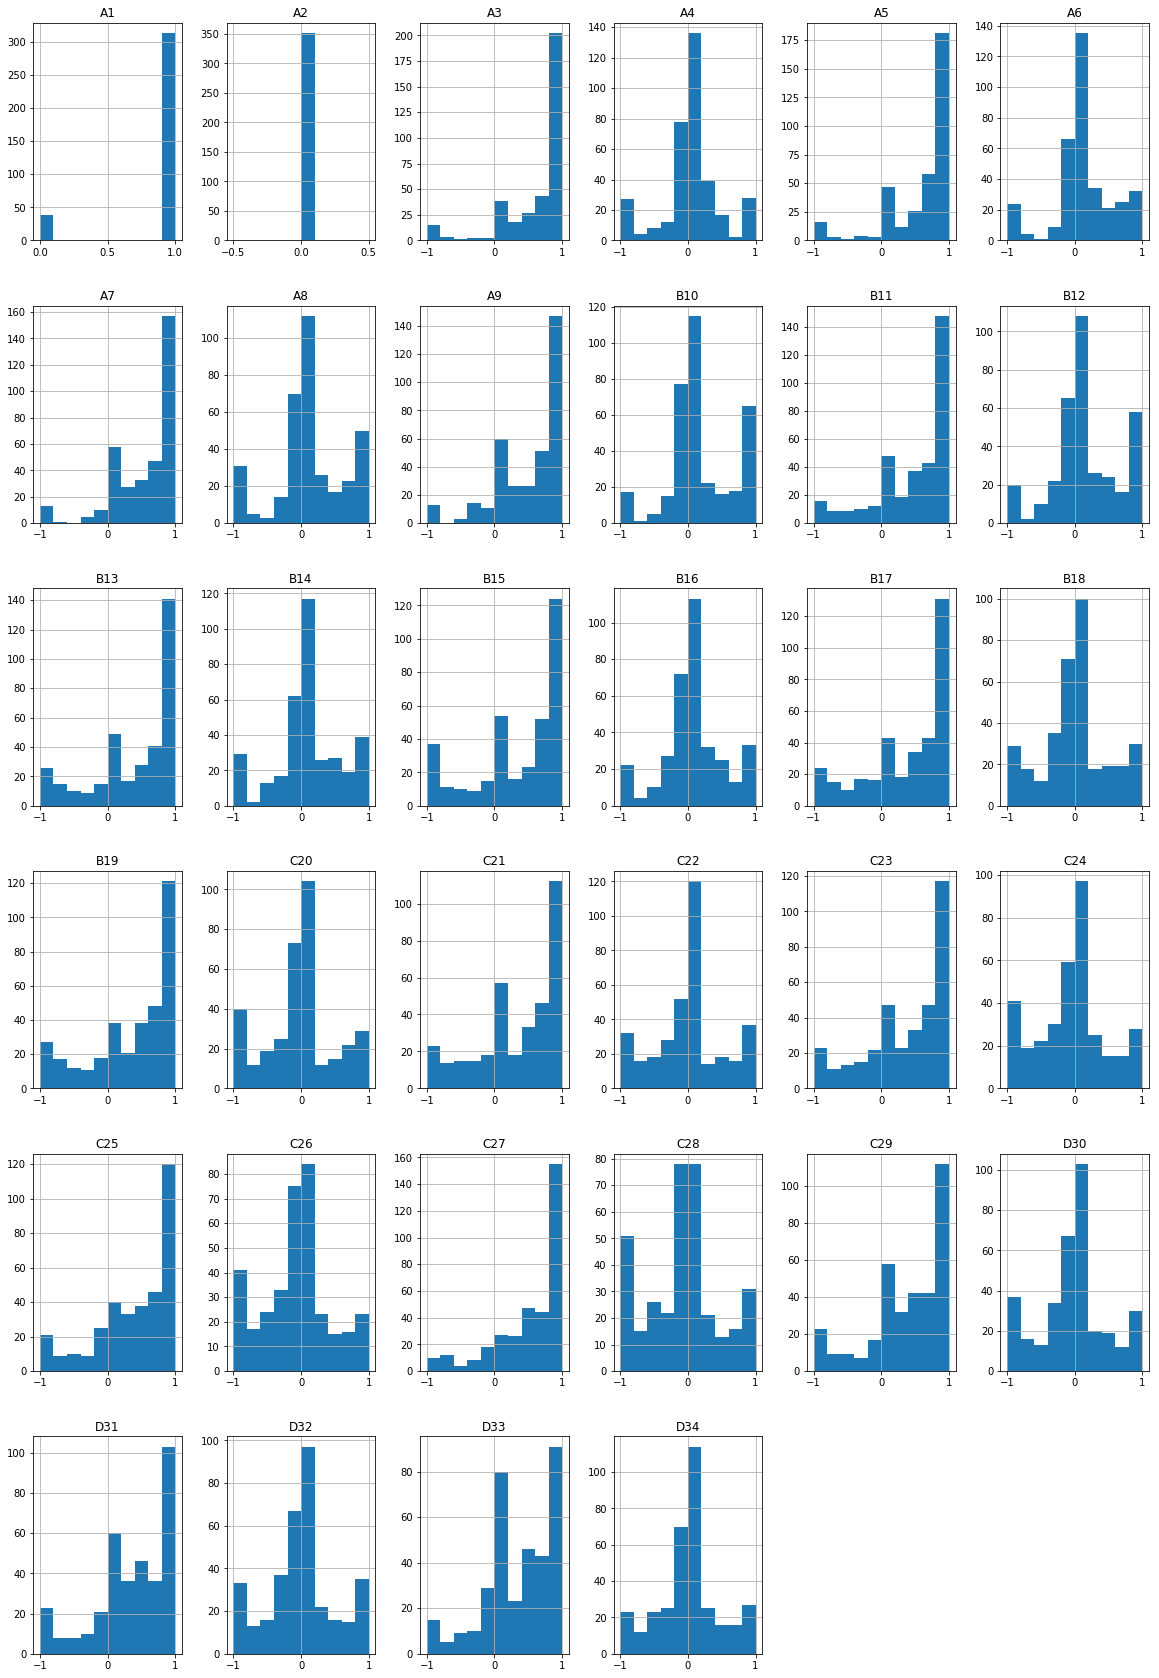

In [11]:
# histograms
dataset.hist(figsize=(20,30))
plt.show()

<p>Histograms show the frequency of various data values in are are useful when trying to determine the uniformity of data.  Looking at the univariate histograms we can see that non of the attributes have a uniform histogram and we can see the skews that were evident in the box and whisker plots.</p> 

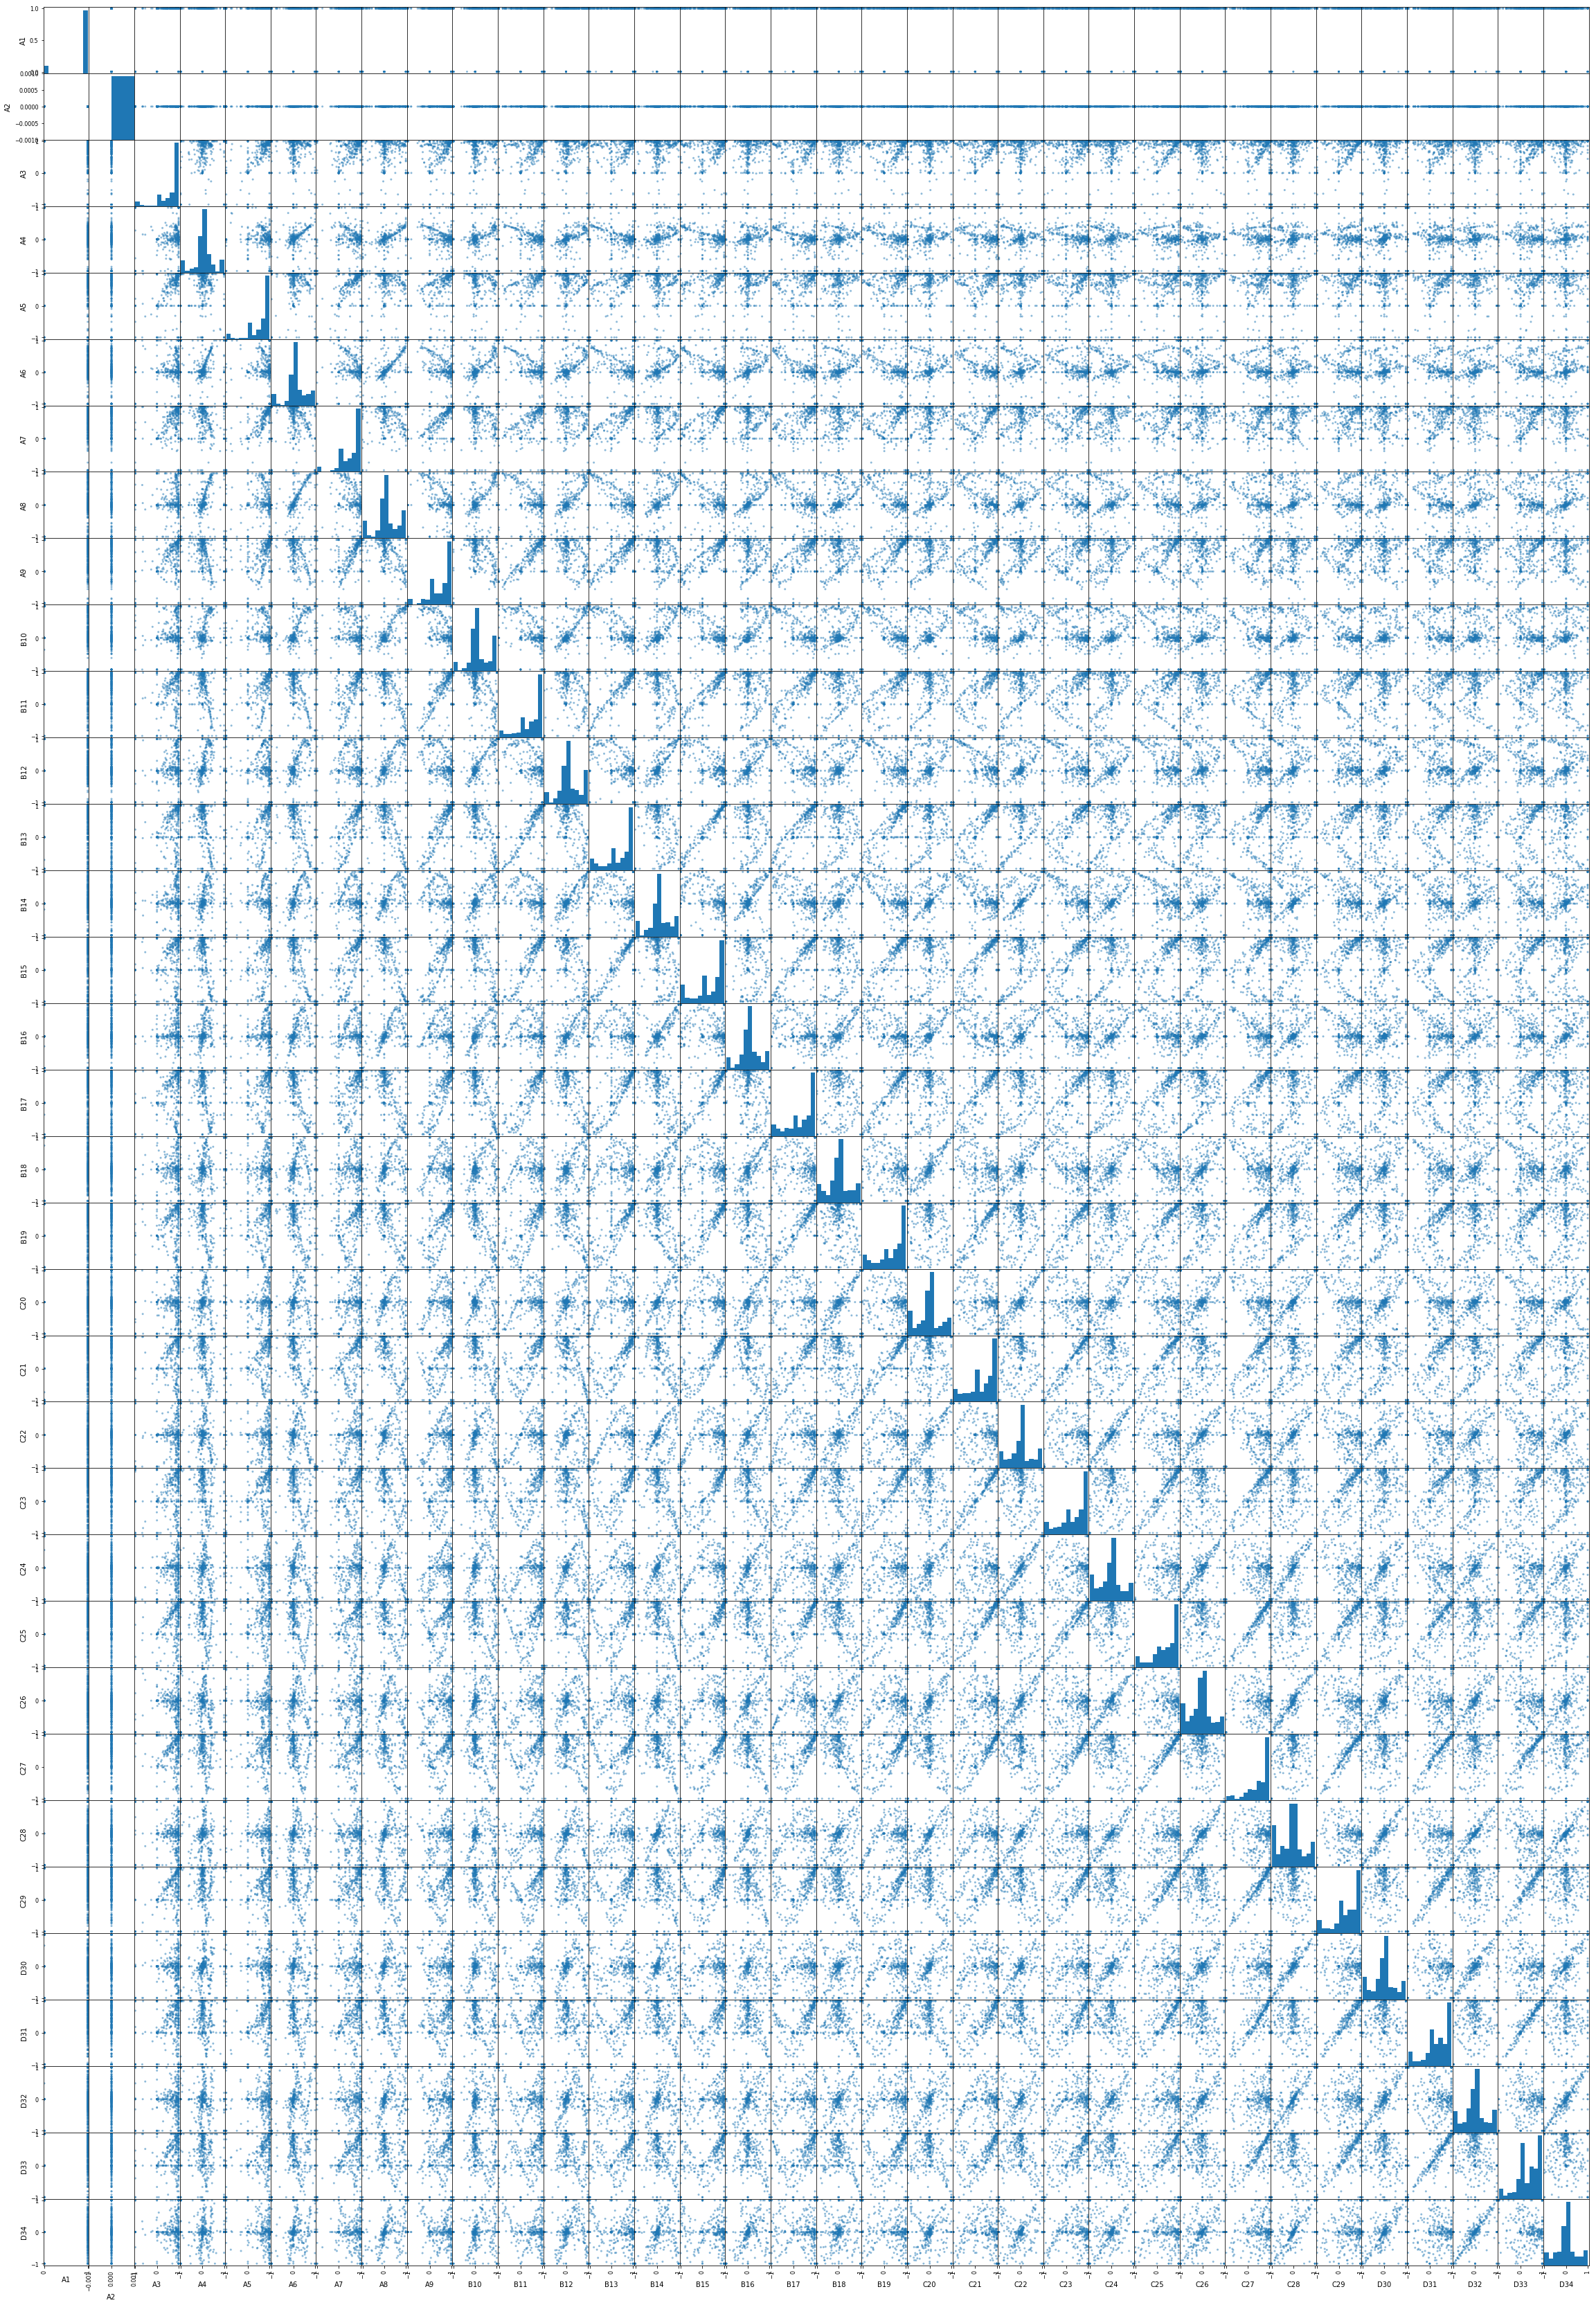

In [12]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(40,60))
plt.show()

<p>A scatter matrix is an excellent way to see how clustered attributes are to one another, and could be used to visually observe the correlation that attributes have to one another. Looking at the scatter plots odd and even attributes have a positive correlation to other odd and even attributes respectively. While odd and even attributes have a negative correlation to one another most likely due to each phase number being represented by 2 attributes each,</p>

<h5 style='color:blue'>Listing 4: Separate out a validation dataset. Build 5 different models to predict species from flower measurements. Select the best model.</h5>

In [13]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:34]
Y = array[:,34]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [14]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [15]:
# evaluate each model in turn,store performance, and output general performance of models
results = []
model_names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.853571 (0.064780)
LDA: 0.867857 (0.061962)
KNN: 0.835714 (0.078571)
CART: 0.853571 (0.054046)
NB: 0.882143 (0.067857)
SVM: 0.925000 (0.046429)


<p>Looking at the training results shows that most of the models performed similarly to one another with the exception of SVM which seems to be abnle to overcome some limitation of the other models with the help of learning a kernel to change the dimensionality of the data to a better representation.</p>

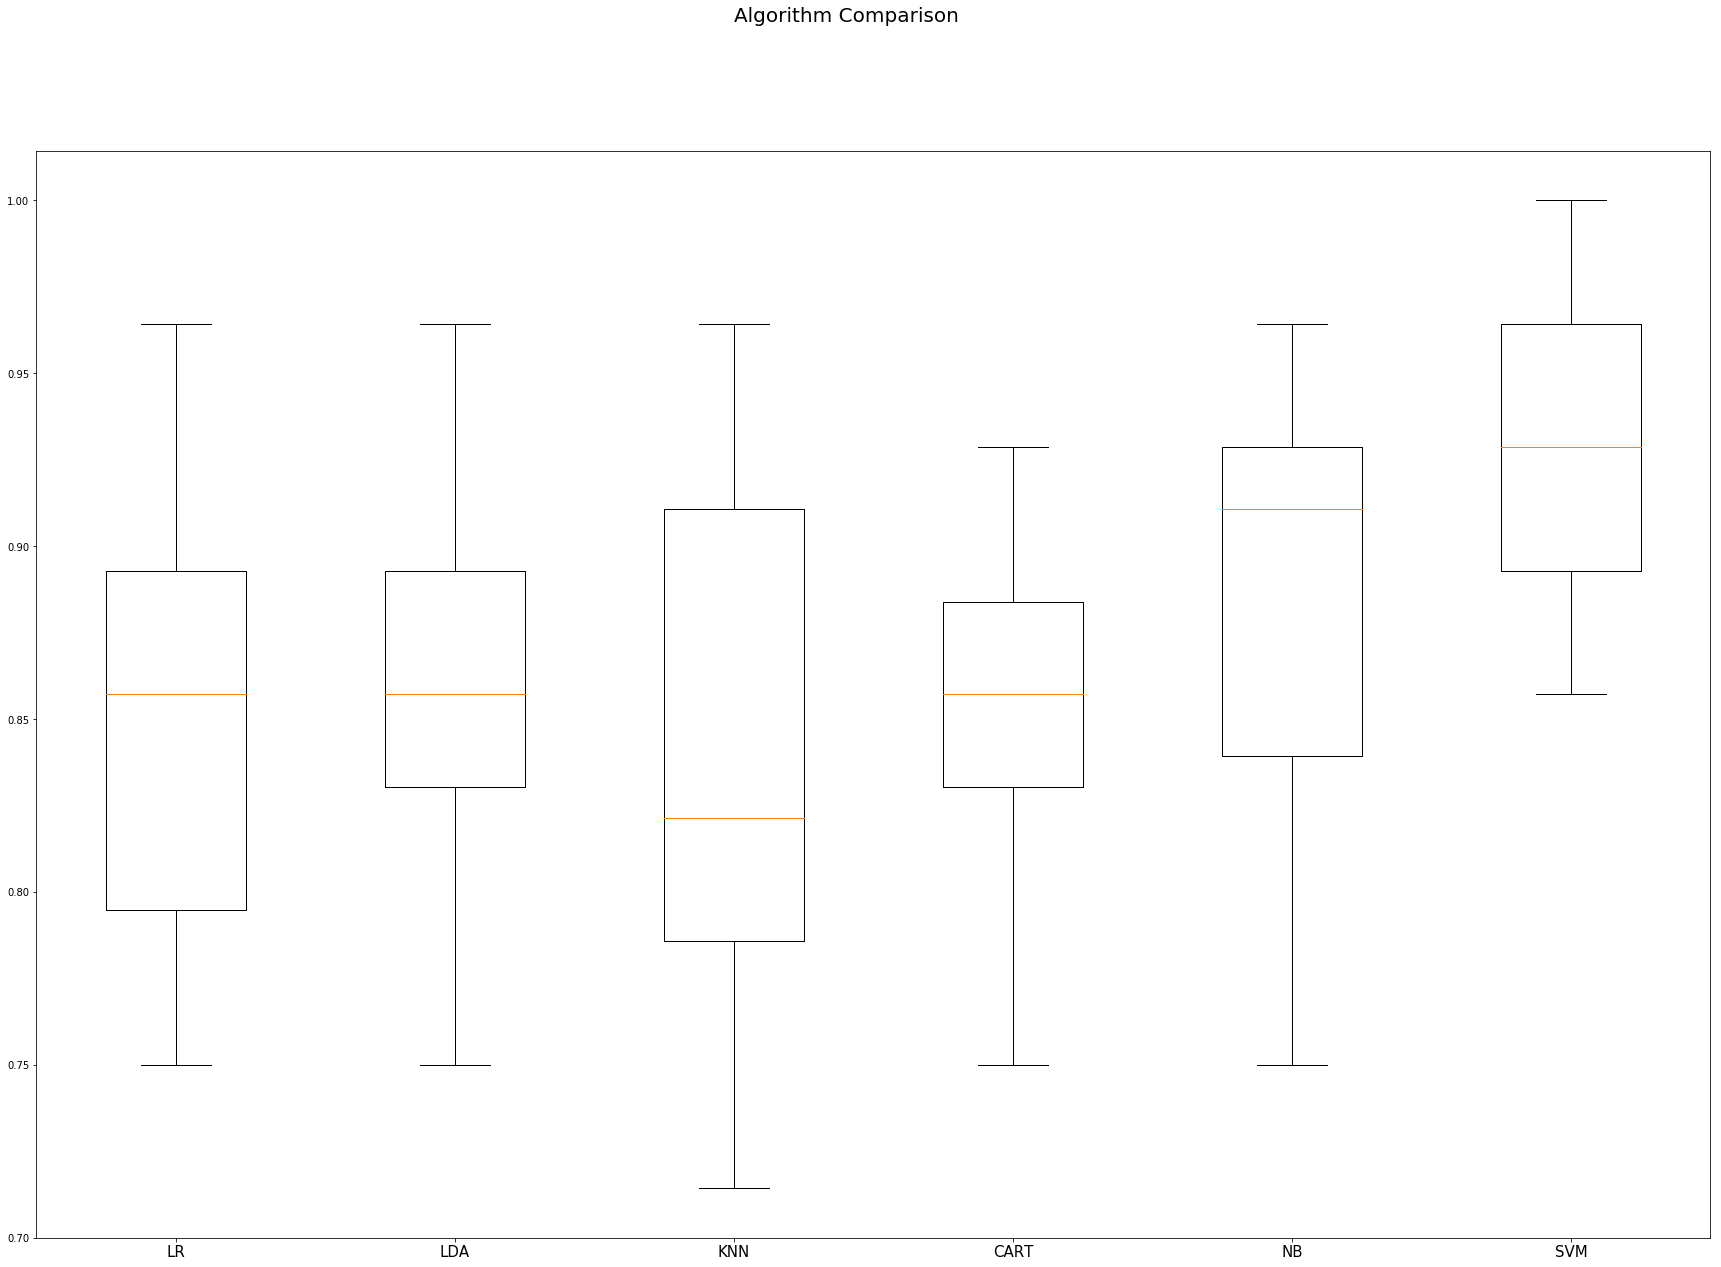

In [16]:
# Compare Algorithms
fig = plt.figure(figsize=(30,20))
fig.suptitle('Algorithm Comparison', fontsize=20)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names, fontdict={'fontsize': 15})
plt.show()

<p>The box and whisker plots further prove that SVM is the superior model for solving the classification problem. SVM had a higher median performance score, and the distibution of scores is much more concise than other box and whisker plots, and obtained a much higher performance score than other models. Many of the other models perform erratically and their performance suffers due to the large number of attributes.</p>

<h5 style='color:blue'>Listing 5: Make Predictions on Validation Dataset</h5> 

In [17]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9014084507042254
[[17  6]
 [ 1 47]]
              precision    recall  f1-score   support

           b       0.94      0.74      0.83        23
           g       0.89      0.98      0.93        48

    accuracy                           0.90        71
   macro avg       0.92      0.86      0.88        71
weighted avg       0.91      0.90      0.90        71



In [18]:
# Make predictions on validation dataset
knn = SVC()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9436619718309859
[[20  3]
 [ 1 47]]
              precision    recall  f1-score   support

           b       0.95      0.87      0.91        23
           g       0.94      0.98      0.96        48

    accuracy                           0.94        71
   macro avg       0.95      0.92      0.93        71
weighted avg       0.94      0.94      0.94        71



<p>When testing the two highest scoring models KNNs and SVM; we see that on our validation data neither the KNNs or SVM models suffer from overfitting and perform regularly; thus meaning that their performance is correctly reported by our graphs.</p>

<h5 style='color:blue'>Overview of Results</h5> 

<ul>
    <li>Looking at the box-and-whisker plots it can be seen that the odd numbered attributes are skewed toward 1.0, and the even numbered attributes are centered around 0. This is further proven by the histograms charts.</li>
    <li>Looking a the results for training the models that do not modify dimensionality of the data perform similarly to one another due to the lack of strong correlation or separability of the attributes. Looking at results when training the models a few conclusions can be infered from the graphs. odels that do not modify dimensionality such as LR, LDA, CART, and NB perform similarly to one another. </li>
    <li>While SVM, which changed the dimensionality of the data using a kernel performed significantly better on average compared to the rest of the models. KNNs was also able to perform significantly better than those linear models when classifying points.</li>
</ul>